In [1]:
import os 
#data_location = input("Enter Path Location of data")
os.chdir("/home/mitchell/Documents/masters/masters/scripts/")
import galaxy_pairs
import cmb
import numpy as np
import scipy as sp
import astropy as ap
import glob
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
import scipy.constants as const
from astropy import constants as ap_const
import scipy.ndimage 
import PIL
from mpdaf.obj import Image,WCS
import sptpol_software as sps
from astropy.io import fits
from astropy.cosmology import Planck15
from astropy import units as u
import scipy.spatial.distance as dist
print(Planck15)
cosmo= Planck15
cwd = os.getcwd()
print(cwd)
from sptpol_software.util.tools import stat
from sptpol_software.observation import *
import sptpol_software.observation as obs
import sptpol_software as sps
import sptpol_software.observation.sky
from sptpol_software.util import files

pywtl packages could not be imported.  This may break plotting code.
FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)
FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)
/home/mitchell/Documents/masters/masters/scripts


In [2]:
size_of_array = int(input("Enter the size of the array: "))
array_1= np.zeros(shape = (size_of_array,size_of_array))
array_2 = np.zeros(shape = (size_of_array,size_of_array))

Enter the size of the array:  60


In [3]:
source_loc_1 = np.array([np.random.randint(0,len(array_1)-10),np.random.randint(0,len(array_1)-10)])
source_loc_2 = np.array([np.random.randint(0,len(array_2)-10),np.random.randint(0,len(array_2)-10)])
print(source_loc_1)
print(source_loc_2)

[13 15]
[19 36]


In [4]:
x1 = source_loc_1[0]
print("x1 = " + str(x1))
print("-x1 = " + str(len(array_1)-x1))
y1 = source_loc_1[1]
print("y1 = " + str(y1))
print("-y1 = " + str(len(array_1)-y1))

x2 = source_loc_2[0]
print("x2 = " + str(x2))
print("-x2 = " + str(len(array_1)-x2))

y2 = source_loc_2[1]
print("y2 = " + str(y2))
print("-y2 = " + str(len(array_1)-y2))

# source = makeGaussian(size_of_source,size_of_source)
# array[x1:x1+source.shape[0], y1:y1+source.shape[1]] = source
# array[-x1-source.shape[0]:-x1, -y1-source.shape[1]:-y1] = source


x1 = 13
-x1 = 47
y1 = 15
-y1 = 45
x2 = 19
-x2 = 41
y2 = 36
-y2 = 24


In [5]:
# plt.imshow(array)

In [6]:
# source_x1 = x1+(source.shape[0]/2)
# source_y1 = y1+(source.shape[1]/2)
# source_x2 = -x1-(source.shape[0]/2)
# source_y2 = -y1+(source.shape[1]/2)

angle_1 = np.degrees(np.arctan((float(len(array_1)-y1)-float(y1))/(float(len(array_1)-x1)-float(x1))))
angle_2 =  np.degrees(np.arctan((float(len(array_2)-y2)-float(y2))/(float(len(array_2)-x2)-float(x2))))

In [7]:
print(angle_1)
print(angle_2)

41.423665625002656
-28.610459665965216


In [8]:
array_1[source_loc_1[0]][source_loc_1[1]] = 1
array_1[-source_loc_1[0]][-source_loc_1[1]] = 1
gauss_array_1 = sp.ndimage.gaussian_filter(array_1,2)
array_2[source_loc_2[0]][source_loc_2[1]] = 1
array_2[-source_loc_2[0]][-source_loc_2[1]] = 1
gauss_array_2 = sp.ndimage.gaussian_filter(array_2,2)

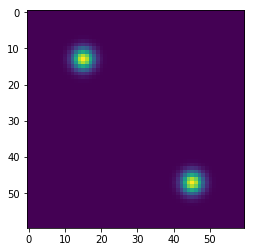

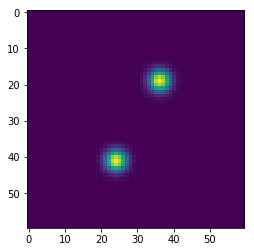

In [9]:
plt.imshow(gauss_array_1)
plt.show()
plt.imshow(gauss_array_2)
plt.show()

In [10]:
rot_array_1 =  sp.ndimage.rotate(gauss_array_1, 90-angle_1, reshape=True)
rot_array_2 =  sp.ndimage.rotate(gauss_array_2, 90-angle_2, reshape=True)

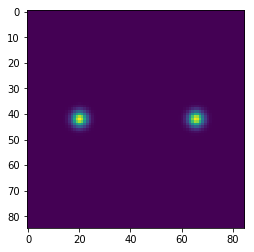

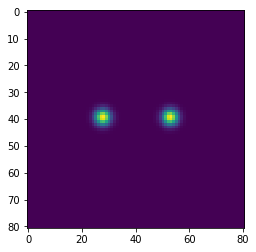

In [11]:
plt.imshow(rot_array_1)
plt.show()
plt.imshow(rot_array_2)
plt.show()

In [12]:
sep_1 = np.sqrt(((len(array_1)-x1)-x1)**2 + ((len(array_1)-y1) - y1)**2)
print(sep_1)
scale_fac_1 = 100.0/sep_1
sep_2 = np.sqrt(((len(array_2)-x2)-x2)**2 + ((len(array_2)-y2) - y2)**2)
print(sep_2)
scale_fac_2 = 100.0/sep_2


45.34313619501854
25.059928172283335


In [13]:
print(scale_fac_1)
print(scale_fac_2)

2.2054054569561545
3.9904344223381107


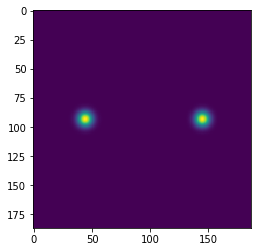

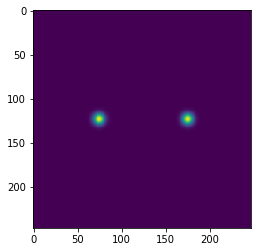

In [14]:
rescaled_array_1 = sp.ndimage.zoom(rot_array_1,scale_fac_1)
plt.imshow(rescaled_array_1)
plt.show()
test = np.pad(rescaled_array_1,30,mode="constant")
plt.imshow(test)
plt.show()


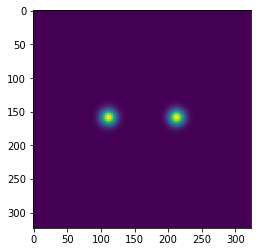

In [15]:
rescaled_array_2 = sp.ndimage.zoom(rot_array_2,scale_fac_2)
plt.imshow(rescaled_array_2)

In [16]:
centre_1 = [len(rescaled_array_1)/2,len(rescaled_array_1)/2]
print(centre_1)
centre_2 = [len(rescaled_array_2)/2,len(rescaled_array_2)/2]
print(centre_2)

[93, 93]
[161, 161]


In [17]:
output_1 = galaxy_pairs.get_subarray(rescaled_array_1,centre_1,min(len(rescaled_array_1),70))
output_2 = galaxy_pairs.get_subarray(rescaled_array_2,centre_2,min(len(rescaled_array_2),70))

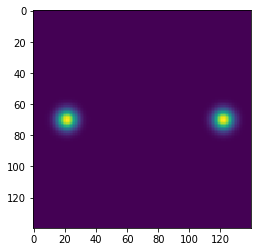

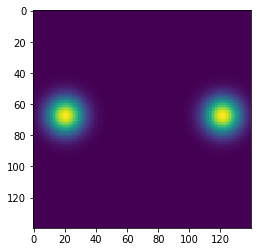

In [19]:
plt.imshow(output_1)
plt.show()
plt.imshow(output_2)
plt.show()

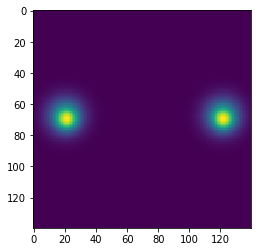

In [20]:
final_output = output_1+output_2
plt.imshow(final_output)

In [31]:
final_output[60:80,15:30]

array([[0.02234954, 0.02441647, 0.02627146, 0.02780802, 0.02892485,
        0.02955523, 0.02965142, 0.02917439, 0.02814349, 0.02663925,
        0.02475999, 0.02261745, 0.02031928, 0.01796492, 0.01564681],
       [0.02539649, 0.02789434, 0.03017551, 0.03210478, 0.03354085,
        0.03438115, 0.03455688, 0.03401413, 0.03277736, 0.0309475 ,
        0.02865437, 0.02605174, 0.02328381, 0.02047625, 0.01774285],
       [0.02858663, 0.03160726, 0.034416  , 0.03683847, 0.038683  ,
        0.03980062, 0.04009272, 0.03948335, 0.03800328, 0.03577979,
        0.03298295, 0.02981994, 0.02648294, 0.023135  , 0.01991938],
       [0.03185997, 0.03549318, 0.03892946, 0.04194617, 0.04429188,
        0.04576053, 0.04621143, 0.0455352 , 0.04377178, 0.0410852 ,
        0.03769593, 0.03387438, 0.02987078, 0.02589607, 0.02213117],
       [0.03514556, 0.03947248, 0.04362788, 0.04733436, 0.0502719 ,
        0.05216676, 0.05282092, 0.05207701, 0.04998867, 0.04677153,
        0.04270789, 0.03813946, 0.03338233, 